In [1]:
### Now going to Analyze the Relationship between the Human Development Index and Total Cases. I'm actually quite interested.

In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
covid_19_df = pd.read_csv('Project Resources/covid_map_data.csv')
covid_19_df.head(5)

,location,iso_code,date,total_vaccinations_x,people_vaccinated_x,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,...,total_cases,new_cases,new_deaths,population_density,gdp_per_capita,handwashing_facilities,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index
0,Albania,ALB,01/10/2021,0.0,0.0,NaN,NaN,NaN,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,ALB,01/11/2021,NaN,NaN,NaN,NaN,64.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,ALB,01/12/2021,128.0,128.0,NaN,NaN,64.0,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,01/13/2021,188.0,188.0,NaN,60.0,63.0,0.01,0.01,...,65334.0,707.0,4.0,104.871,11803.431,0.0,10.08,2.89,78.57,0.795
4,Albania,ALB,01/14/2021,266.0,266.0,NaN,78.0,66.0,0.01,0.01,...,65994.0,660.0,5.0,104.871,11803.431,0.0,10.08,2.89,78.57,0.795


In [4]:
final_df = covid_19_df.drop(columns=["people_fully_vaccinated", "total_vaccinations_per_hundred", "people_vaccinated_per_hundred", "people_fully_vaccinated_per_hundred", "daily_vaccinations_per_million", "Note", "new_cases", "new_deaths", "handwashing_facilities", "hospital_beds_per_thousand", "Country", "Status", "diabetes_prevalence", "life_expectancy"])

In [5]:
final_df["date"] = pd.to_datetime(final_df["date"])
final_df['date'] = final_df['date'].dt.strftime('%m/%d/%Y')
final_df.head()

,location,iso_code,date,total_vaccinations_x,people_vaccinated_x,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_y,people_vaccinated_y,total_deaths,total_cases,population_density,gdp_per_capita,human_development_index
0,Albania,ALB,01/10/2021,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,ALB,01/11/2021,NaN,NaN,NaN,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,ALB,01/12/2021,128.0,128.0,NaN,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,01/13/2021,188.0,188.0,60.0,63.0,188.0,188.0,1256.0,65334.0,104.871,11803.431,0.795
4,Albania,ALB,01/14/2021,266.0,266.0,78.0,66.0,266.0,266.0,1261.0,65994.0,104.871,11803.431,0.795


In [6]:
covid_final_df = final_df.dropna()
covid_final_df.head()

,location,iso_code,date,total_vaccinations_x,people_vaccinated_x,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_y,people_vaccinated_y,total_deaths,total_cases,population_density,gdp_per_capita,human_development_index
3,Albania,ALB,01/13/2021,188.0,188.0,60.0,63.0,188.0,188.0,1256.0,65334.0,104.871,11803.431,0.795
4,Albania,ALB,01/14/2021,266.0,266.0,78.0,66.0,266.0,266.0,1261.0,65994.0,104.871,11803.431,0.795
5,Albania,ALB,01/15/2021,308.0,308.0,42.0,62.0,308.0,308.0,1265.0,66635.0,104.871,11803.431,0.795
6,Albania,ALB,01/16/2021,369.0,369.0,61.0,62.0,369.0,369.0,1270.0,67216.0,104.871,11803.431,0.795
7,Albania,ALB,01/17/2021,405.0,405.0,36.0,58.0,405.0,405.0,1277.0,67690.0,104.871,11803.431,0.795


In [7]:
covid_final_df["total_cases"] = covid_final_df["total_cases"].astype(int)
covid_final_df.dtypes

/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


location                    object
iso_code                    object
date                        object
total_vaccinations_x       float64
people_vaccinated_x        float64
daily_vaccinations_raw     float64
daily_vaccinations         float64
total_vaccinations_y       float64
people_vaccinated_y        float64
total_deaths               float64
total_cases                  int64
population_density         float64
gdp_per_capita             float64
human_development_index    float64
dtype: object

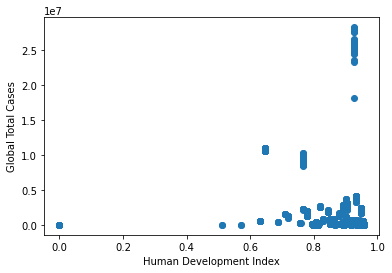

In [8]:
### Relationship Betweeen HDI and Total Cases
plt.scatter(covid_final_df.human_development_index, covid_final_df.total_cases)
plt.xlabel("Human Development Index")
plt.ylabel("Global Total Cases")
plt.show()

In [9]:
X = covid_final_df.human_development_index.values.reshape(-1,1)

In [10]:
y = covid_final_df.total_cases

In [11]:
model = LinearRegression()

In [12]:
model.fit(X,y)

LinearRegression()

In [13]:
y_pred = model.predict(X)
print(y_pred.shape)

(1267,)


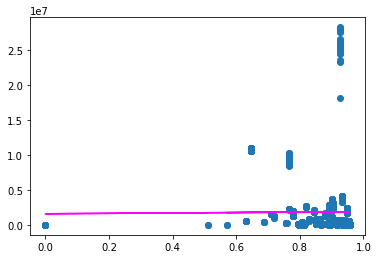

In [14]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='magenta')
plt.show()

In [15]:
print(model.coef_)
print(model.intercept_)

[294830.96770948]
1597986.2147923063


In [16]:
hdi_column = covid_final_df['human_development_index']
cases_column = covid_final_df['total_cases']

In [17]:
correlation = hdi_column.corr(cases_column)
correlation

0.010899452583626464

In [ ]:
### Very Little Correlation between Human Development Index and Total Cases

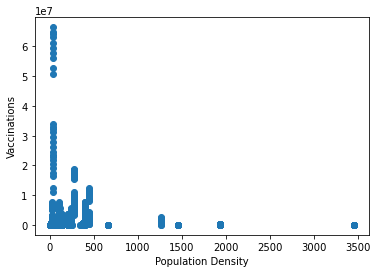

In [19]:
plt.scatter(covid_final_df.population_density, covid_final_df.total_vaccinations_x)
plt.xlabel("Population Density")
plt.ylabel("Vaccinations")
plt.show()

In [20]:
pop_column = covid_final_df['population_density']
vaccinations_column = covid_final_df['total_vaccinations_x']

In [22]:
correlation_pop = pop_column.corr(vaccinations_column)

In [23]:
correlation_pop

-0.07018228957197896